In [75]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
N = 0
START = 0.1
STOP = 1
EPS = 0.1
def function(x):
  global N
  N += 1
  return 10*x*math.log(x) - (x**2 / 2)

Выбрать для выполнения лабораторной работы тестовую функцию, номер которой соответствует номеру Вашего компьютера.

In [1]:
import sympy as sp
x = sp.Symbol('x')
y = 10 * x * sp.ln( x ) - ( x ** 2 / 2 )
print(y.diff(x))
print(y.diff(x, x))

-x + 10*log(x) + 10
-1 + 10/x


In [77]:
def first_diff(x):
  global N
  N += 1
  return -x+10*math.log(x)+10

def second_diff(x):
  global N
  N += 1
  return -1 + 10/x

In [78]:
EPSILONS = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
funcs = []

Написать в среде MATLAB функции, реализующие метод паребора, метод поразрядного поиска, метод дихотомии, метод золотого сечения, метод парабол, метод средней точки, метод хорд и метод Ньютона.

In [79]:
#Перебор
def perebor(start, stop, epsilon):
  numberOfSteps = int((stop-start)/epsilon)
  minF = function(start)
  minArg = start
  for val in np.linspace(start, stop, num=numberOfSteps):
    eval = function(val)
    if (minF > eval):
      minF = eval
      minArg = val
  return (minF, minArg)
funcs.append(('Перебор', perebor))

In [80]:
# Поразрядный поиск
def porPoisk(start, stop, epsilon):
  step = (stop - start)/4
  if step < epsilon:
    print(f'step > epsilon, step={step} epsilon={epsilon}')
  minArg = val = start
  fNext = function(minArg)
  minF = 0
  while abs(step) > epsilon:
    val += step
    f = fNext
    fNext = function(val)

    if fNext > f:
      minF = f;
      minArg = val
      step /= -4
      # print('change direction')
  return (minF, minArg)
funcs.append(('Поразрядный поиск', porPoisk))
  

In [81]:
# Дихотомия
def dihotomia(start, stop, epsilon, delta):
  if (0 > delta) or (delta > 2 * epsilon):
    print('invalid q')
    return 0
  leftPoint = (start + stop - delta) / 2
  rightPoint = (start + stop + delta) / 2
  while (stop - start)/2 > epsilon:

    if function(leftPoint) < function(rightPoint):
      stop = rightPoint
    else:
      start = leftPoint
    leftPoint = (start + stop - delta) / 2
    rightPoint = (start + stop + delta) / 2
  minArg = (start + stop) / 2
  minF = function(minArg)
  return (minF, minArg)


def normalizer(start, stop, epsilon):
  return dihotomia(start, stop, epsilon, epsilon)

  
funcs.append(('Дихотомия', normalizer))

In [82]:
# Золотое сечение
def golden(start, stop, epsilon):
  tau = (math.sqrt(5) - 1) / 2
  leftPoint = start + (1 - tau)*(stop - start)
  rightPoint = start + tau*(stop - start)
  leftF = function(leftPoint)
  rightF = function(rightPoint)
  while abs(stop - start) > epsilon:
    if leftF >= rightF:
      start = leftPoint
      leftPoint = rightPoint
      leftF = rightF
      rightPoint = start + tau*(stop - start)
      rightF = function(rightPoint)
    else:
      stop = rightPoint
      rightPoint = leftPoint
      rightF = leftF
      leftPoint = start + (1 - tau)*(stop - start)
      leftF = function(leftPoint)
  minArg = (start + stop) / 2
  minF = function(minArg)
  return (minF, minArg)
funcs.append(('Золотое сечение', golden))
    

In [83]:
def parabola(start, stop, epsilon):
  (x1, x2, x3, f1, f2, f3) = goldPoints(start, stop)

  a1 = (f2 - f1)/(x2 - x1)
  a2 = 1/(x3 - x2) * ((f3 - f1)/(x3 - x1) - (f2 - f1)/(x2 - x1))
  newX = (x1 + x2 - a1/a2)/2

  if (x1<newX<x2<x3):
    x1 = newX
    f1 = function(newX)
  
  if ((x1<x2<newX<x3)):
    x3 = newX
    f3 = function(newX)

  oldX = newX

  a1 = (f2 - f1)/(x2 - x1)
  a2 = 1/(x3 - x2) * ((f3 - f1)/(x3 - x1) - (f2 - f1)/(x2 - x1))
  newX = (x1 + x2 - a1/a2)/2

  while abs(oldX - newX) > epsilon:

    if (x1<newX<x2<x3):
      x1 = newX
      f1 = function(newX)
  
    if ((x1<x2<newX<x3)):
      x3 = newX
      f3 = function(newX)

    oldX = newX

    a1 = (f2 - f1)/(x2 - x1)
    a2 = 1/(x3 - x2) * ((f3 - f1)/(x3 - x1) - (f2 - f1)/(x2 - x1))
    newX = (x1 + x2 - a1/a2)/2
  
  minArg = newX
  minF = function(newX)
  return (minF, minArg)

def goldPoints(start, stop):
  tau = (math.sqrt(5) - 1) / 2
  leftPoint = start + (1 - tau)*(stop - start)
  rightPoint = start + tau*(stop - start)
  leftF = function(leftPoint)
  rightF = function(rightPoint)
  startF = function(start)
  stopF = function(stop)
  while True:

    if (startF >= leftF < stopF) or (startF > leftF <= stopF):
      return (start, leftPoint, stop, startF, leftF, stopF)

    if (leftF >= rightF < stopF) or (leftF > rightF <= stopF):
      return (leftPoint, rightPoint, stop, leftF, rightF, stopF)

    if leftF >= rightF:
      start = leftPoint
      leftPoint = rightPoint
      startF = leftF
      leftF = rightF
      rightPoint = start + tau*(stop - start)
      rightF = function(rightPoint)
    else:
      stop = rightPoint
      rightPoint = leftPoint
      stopF = rightF
      rightF = leftF
      leftPoint = start + (1 - tau)*(stop - start)
      leftF = function(leftPoint)
funcs.append(('Парабола', parabola))

In [84]:
# Средняя точка
def meanPoint(start, stop, epsilon):
  mP = (start + stop)/2
  fD = first_diff(mP)
  while (abs(fD) > epsilon):
  # while (abs(start - stop)/2> epsilon):
    if (fD > 0):
      stop = mP

    if (fD < 0):
      start = mP
    
    mP = (start + stop)/2
    fD = first_diff(mP)
  
  minArg = mP
  minF = function(mP)
  return (minF, minArg)  

funcs.append(('Средняя точка', meanPoint))

In [85]:
# Метод хорд
def horda(start, stop, epsilon):
  startDiff = first_diff(start)
  stopDiff = first_diff(stop)
  hP = start - startDiff/(startDiff - stopDiff) * (start - stop)
  tmpDiff = first_diff(hP)
  while abs(tmpDiff) > epsilon:
    if (tmpDiff < 0):
      start = hP
      startDiff = first_diff(start)

    if (tmpDiff > 0):
      stop = hP
      stopDiff = first_diff(stop)

    hP = start - startDiff/(startDiff - stopDiff) * (start - stop)
    tmpDiff = first_diff(hP)

  minArg = hP
  minF = function(hP)
  return (minF, minArg)  

funcs.append(('Метод Хорд', horda))

In [86]:
# Ньютон
def newton(start, stop, epsilon):
  xprev = start
  fD = first_diff(xprev)
  sD = second_diff(xprev)
  nP = xprev - fD/sD

  while abs(fD) > epsilon:
    xprev = nP
    fD = first_diff(xprev)
    sD = second_diff(xprev)
    nP = xprev - fD/sD

  minArg = nP
  minF = function(nP)
  return (minF, minArg)  

funcs.append(('Метод Ньютона', newton))

In [87]:
tmp = {'name': [], **{f'EPS={eps}': [] for eps in EPSILONS}}
for f in funcs:
  tmp['name'].append(f[0])
  for eps in EPSILONS:
    (minF, minArg) = f[1](START, STOP, eps)
    tmp[f'EPS={eps}'].append(N)
    N = 0

newDf = pd.DataFrame(tmp)

In [88]:
newDf.iloc[:,1:]=newDf.iloc[:,1:]-1

Для выбранной функции (построить ее график!) и для каждого рассмотренного выше метода изучить зависимость скорости работы (числа вычислений функции или производной  ) от заданного значения точности  . Провести сравнение методов друг с другом. Объяснить полученные результаты. 

In [89]:
newDf

,name,EPS=0.1,EPS=0.01,EPS=0.001,EPS=0.0001,EPS=1e-05,EPS=1e-06
0,Перебор,9,90,900,9000,90000,900000
1,Поразрядный поиск,2,11,16,27,41,46
2,Дихотомия,8,14,20,28,34,40
3,Золотое сечение,7,12,17,21,26,31
4,Парабола,5,6,6,6,6,6
5,Средняя точка,4,10,13,15,20,24
6,Метод Хорд,15,21,27,33,39,43
7,Метод Ньютона,8,10,10,10,12,12


In [90]:
newDf

,name,EPS=0.1,EPS=0.01,EPS=0.001,EPS=0.0001,EPS=1e-05,EPS=1e-06
0,Перебор,9,90,900,9000,90000,900000
1,Поразрядный поиск,2,11,16,27,41,46
2,Дихотомия,8,14,20,28,34,40
3,Золотое сечение,7,12,17,21,26,31
4,Парабола,5,6,6,6,6,6
5,Средняя точка,4,10,13,15,20,24
6,Метод Хорд,15,21,27,33,39,43
7,Метод Ньютона,8,10,10,10,12,12


In [91]:
newDf[(newDf['name'] == 'Поразрядный поиск') | (newDf['name'] == 'Средняя точка')]

,name,EPS=0.1,EPS=0.01,EPS=0.001,EPS=0.0001,EPS=1e-05,EPS=1e-06
1,Поразрядный поиск,2,11,16,27,41,46
5,Средняя точка,4,10,13,15,20,24


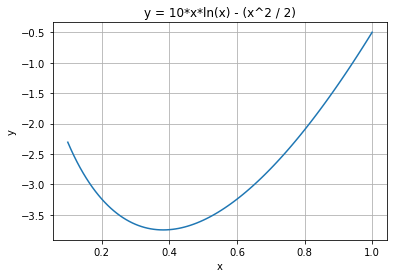

In [19]:
x = np.linspace(START, STOP, 100)
y= 10*x*np.log(x) - (np.power(x, 2) / 2)


fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='x', ylabel='y',
       title='y = 10*x*ln(x) - (x^2 / 2)')
ax.grid()

plt.show()

С помощью метода Ньютона, используя аналитические производные и  их численные аппроксимации решить задачу минимизации функции.
для нескольких вариантов выбора начального приближения. Убедиться в том, что при выборе начального приближения не достаточно близко от точки минимума метод Ньютона может расходиться. Найти диапазон начальных приближений, при которых метод сходиться к точке минимума функции.


In [190]:
import sympy
x = sympy.Symbol('x')
f = x * sympy.atan(x) - 1/2 * sympy.log(1 + x **2)

In [191]:
def newton_sympy(start: float, epsilon=1e-6):
  xprev = start
  fD = sympy.diff(f)
  sD = sympy.diff(fD)
  nP = xprev - fD.subs(x, xprev)/sD.subs(x, xprev)


  while abs(fD.subs(x, xprev)) > epsilon:
    xprev = nP
    nP = xprev - fD.subs(x, xprev)/sD.subs(x, xprev)
    if nP - xprev > 10000: return False

  return minArg


![Alt text](../../../../../D:/5course1sem/%D0%9C%D0%9E/MO/lab1/Screenshot_16.png)

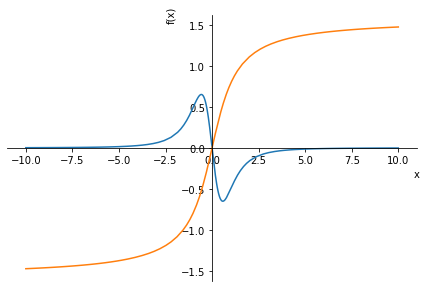

In [ ]:
p1 = sympy.plotting.plot(sympy.diff(f,x,3), sympy.diff(f,x,1))
p1

In [192]:
newton_sympy(1.39)

0.3822124174679943

In [193]:
def getBoundaries(cb):
  closePoints = []
  for i in range(-300, 300, 1):
    if (isinstance(cb(i/100), bool)):
      pass
    else:
      closePoints.append(i/100)
  print(f'x should be from {min(closePoints)} to {max(closePoints)}')
  return closePoints

In [194]:
getBoundaries(newton_sympy)
1

x should be from -1.39 to 1.39


1

In [196]:
def newtonRaf_sympy(start: float, epsilon=1e-6):
  xprev = start
  fD = sympy.diff(f)
  sD = sympy.diff(fD)
  nP = xprev - fD.subs(x, xprev)/sD.subs(x, xprev)
  tk = fD.subs(x,xprev)**2 / (fD.subs(x,xprev)**2 + fD.subs(x,nP)**2)

  while abs(fD.subs(x, xprev)) > epsilon:
    xprev = nP
    nP = xprev - tk * fD.subs(x, xprev)/sD.subs(x, xprev)
    tk = fD.subs(x,xprev)**2 / (fD.subs(x,xprev)**2 + fD.subs(x,nP)**2)
    if nP - xprev > 10000: return False

  return minArg

In [197]:
getBoundaries(newtonRaf_sympy)
1

x should be from -1.91 to 1.91


1

In [198]:
newtonRaf_sympy(1.91)
1

1

In [199]:
def newtonMark_sympy(start: float, epsilon=1e-6):
  xprev = start
  fD = sympy.diff(f)
  sD = sympy.diff(fD)
  myk = sD.subs(x, xprev) * 100
  nP = xprev - fD.subs(x, xprev)/(sD.subs(x, xprev) + myk)

  while abs(fD.subs(x, xprev)) > epsilon:
    if (f.subs(x, nP) < f.subs(x, xprev)):
      myk = myk / 2
    else:
      myk = myk * 2
    xprev = nP
    nP = xprev - fD.subs(x, xprev)/sD.subs(x, xprev)
    if nP - xprev > 10000: return False

  return minArg

In [200]:
getBoundaries(newtonMark_sympy)
1

x should be from -1.42 to 1.42


1

In [201]:
newtonMark_sympy(1.42)

0.3822124174679943